In [ ]:
                                                                  POTATO DISEASE CLASSIFICATION

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [8]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[2 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1]


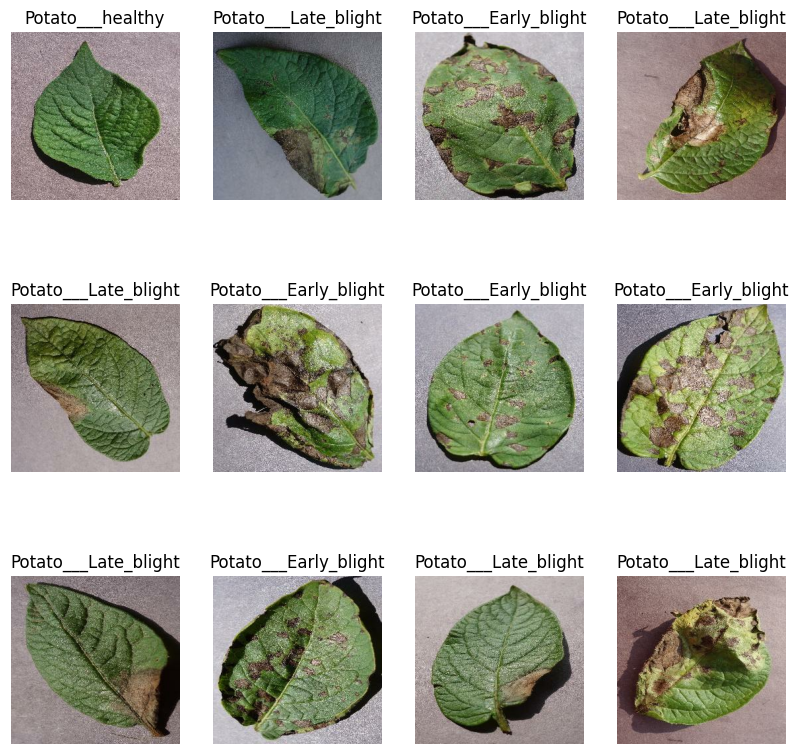

In [9]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
#80% ==> Training
#10% ==> validation
#10% ==> Test

In [11]:
train_size=0.8
len(dataset)
#1 batch 32 img 68*32=2176 (total_images)

68

In [12]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds=dataset.take(54)
len(train_ds)
#54 batches to train

54

In [14]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [15]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert train_split + val_split + test_split == 1
    ds_size=len(ds)

    if shuffle:
       ds = ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [19]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
#performance tuning k liye h ye performance inhance ho jata h
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
#now we have image as numpy array
#now we will normalize the numbers in array make number between 0 to 1

In [25]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [26]:
#data augmentation use krenge ab usse exiting data me small amount of change kr ke multiple data generate krenge data ko ache se train krne k liye
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
]
)

In [27]:
                              #PREPROCESSING AND LOADING OF THE DATA IS DONE

In [28]:
#model architecture
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax"),
    ])
model.build(input_shape=input_shape)

In [29]:
 model.summary()
 #(batch_size,x,y,rgb channel)
 #x*y image size

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

54/54 [==============================] - 273s 187ms/step - loss: 0.9162 - accuracy: 0.5046 - val_loss: 0.7701 - val_accuracy: 0.5781
Epoch 2/50
54/54 [==============================] - 3s 64ms/step - loss: 0.7415 - accuracy: 0.6522 - val_loss: 0.4921 - val_accuracy: 0.8385
Epoch 3/50
54/54 [==============================] - 3s 61ms/step - loss: 0.4243 - accuracy: 0.8206 - val_loss: 0.2831 - val_accuracy: 0.8906
Epoch 4/50
54/54 [==============================] - 3s 61ms/step - loss: 0.3174 - accuracy: 0.8692 - val_loss: 0.3302 - val_accuracy: 0.8698
Epoch 5/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2852 - accuracy: 0.8848 - val_loss: 0.3008 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2538 - accuracy: 0.9022 - val_loss: 0.2503 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2226 - accuracy: 0.9178 - val_loss: 0.2158 - val_accuracy: 0.9219
Epoch 8/50
54/54 [===

In [32]:
len(test_ds)

8

In [33]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 7s 26ms/step - loss: 0.1377 - accuracy: 0.9648


In [34]:
scores

[0.1376720815896988, 0.96484375]

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [37]:
history.history['loss']

[0.9161656498908997,
 0.7414649128913879,
 0.42428553104400635,
 0.31740322709083557,
 0.28520867228507996,
 0.2538079023361206,
 0.22256940603256226,
 0.22583149373531342,
 0.14355981349945068,
 0.1314840167760849,
 0.15720808506011963,
 0.13157576322555542,
 0.10057349503040314,
 0.0661264955997467,
 0.0836176872253418,
 0.07208387553691864,
 0.11396092176437378,
 0.09497460722923279,
 0.047322288155555725,
 0.0756022036075592,
 0.06009213253855705,
 0.06287500262260437,
 0.04103819653391838,
 0.051073893904685974,
 0.05917808786034584,
 0.03604772686958313,
 0.03826162964105606,
 0.028996197506785393,
 0.034027621150016785,
 0.08742617815732956,
 0.05315548926591873,
 0.03812265768647194,
 0.032235052436590195,
 0.0330682098865509,
 0.03489658981561661,
 0.03313418850302696,
 0.05081811919808388,
 0.03872539848089218,
 0.035513266921043396,
 0.031634122133255005,
 0.02548776939511299,
 0.037206195294857025,
 0.0663403570652008,
 0.09807940572500229,
 0.03514644876122475,
 0.02390666

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

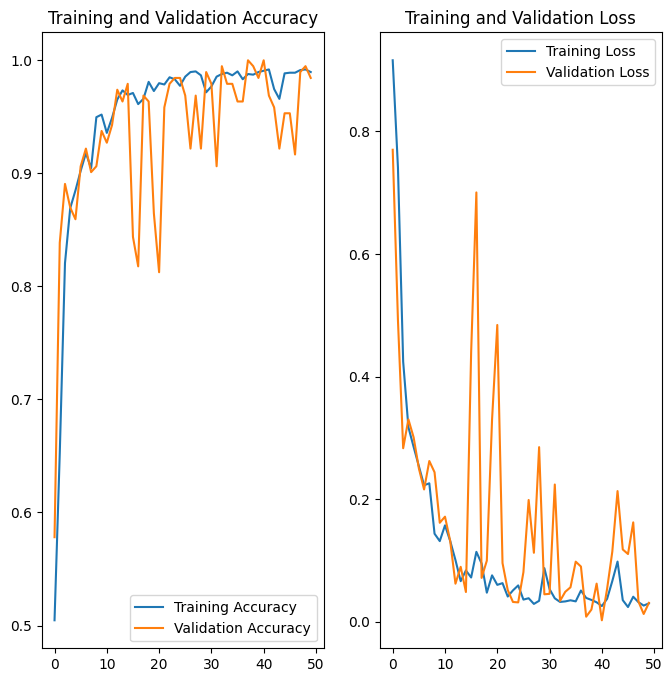

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: Potato___Early_blight
1/1 [==============================] - 0s 28ms/step
Predicted Label: Potato___Early_blight


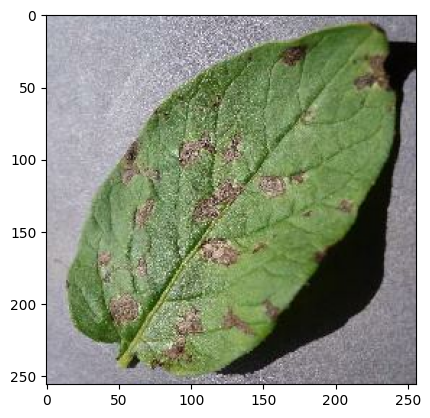

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])